# Importing Libraries 

In [29]:
import numpy as np
import matplotlib.pyplot as pt
import h5py
import scipy
import PIL
from PIL import Image
from scipy import ndimage

## Importing dataset

In [2]:
trainSet = h5py.File('datasets/train_catvnoncat.h5','r')

In [42]:
trainSet.keys() #looking for the keys available in dataset

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

## Assigning different variable to each key in data set

In [4]:
Train_set_X = trainSet['train_set_x']
Train_set_y = trainSet['train_set_y']
classes = trainSet['list_classes']

In [43]:
trainSet['train_set_x'] #checking the shape

<HDF5 dataset "train_set_x": shape (209, 64, 64, 3), type "|u1">

In [44]:
print(f'The type of Train_set_x {Train_set_X.dtype}')
print(f'The shape of Train_set_x {Train_set_X.shape}')
print('--------------------------------------------')
print(f'The type of Train_set_y {Train_set_y.dtype}')
print(f'The shape of Train_set_y {Train_set_y.shape}')


The type of Train_set_x uint8
The shape of Train_set_x (209, 64, 64, 3)
--------------------------------------------
The type of Train_set_y int64
The shape of Train_set_y (1, 209)


## ploting some of the images

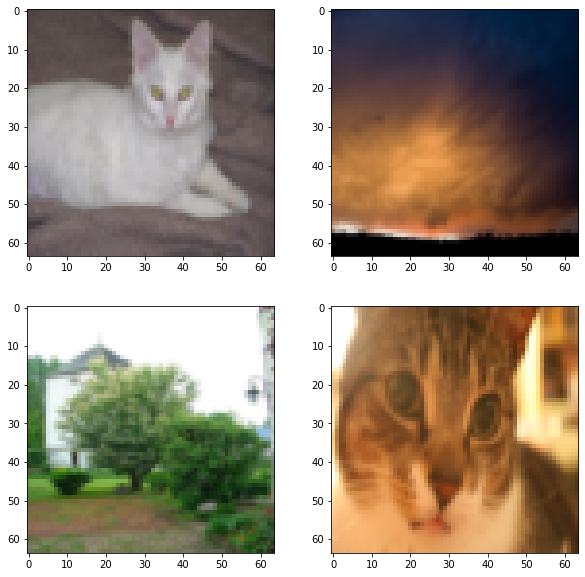

In [7]:
pt.figure(figsize=[10,10])
pt.subplot(221)
pt.imshow(Train_set_X[109])
pt.subplot(222)
pt.imshow(Train_set_X[0])
pt.subplot(223)
pt.imshow(Train_set_X[55])
pt.subplot(224)
pt.imshow(Train_set_X[200])
pt.show()

## Ploting the images with their labels

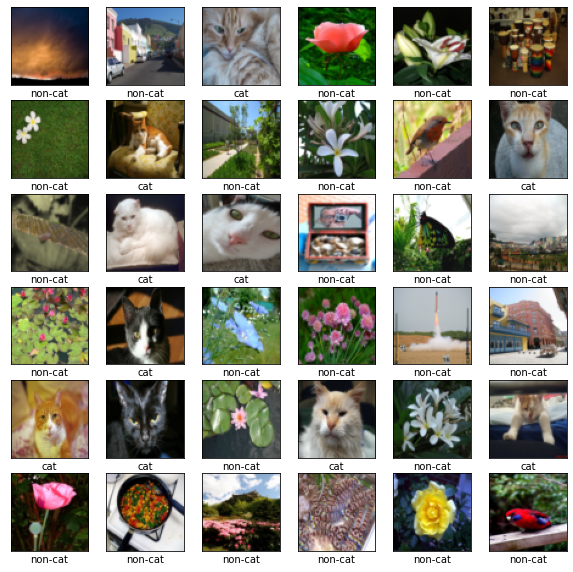

In [9]:
pt.figure(figsize=(10,10))
for i in range(36):
    pt.subplot(6,6,i+1)
    pt.xticks([])
    pt.yticks([])
    pt.grid=False
    pt.imshow(Train_set_X[i])
    pt.xlabel(str(classes[Train_set_y[i]])[2:-1])

## Importing the test dataset

In [10]:
Test_set = h5py.File('datasets/test_catvnoncat.h5','r')
Test_set_X = Test_set['test_set_x']
Test_set_y = Test_set['test_set_y']

In [11]:
Train_set_X = np.array(Train_set_X[:])
Train_set_y = np.array(Train_set_y[:])
Test_set_X = np.array(Test_set_X[:])
Test_set_y = np.array(Test_set_y[:])
classes = np.array(classes[:])

In [12]:
Train_set_y.shape

(209,)

In [13]:
Train_set_y = Train_set_y.reshape((1, Train_set_y.shape[0]))
Test_set_y = Test_set_y.reshape((1, Test_set_y.shape[0]))

In [14]:
print(f'The shape of Test data set is {Test_set_X.shape}')
print(f'The lable of Test data set is {Test_set_y.shape}')

The shape of Test data set is (50, 64, 64, 3)
The lable of Test data set is (1, 50)


In [15]:
m_train = Train_set_X.shape[0]
m_test = Test_set_X.shape[0]
no_pixels = Train_set_X.shape[1]
print('===========================================')
print(f'The number of Training examples are: {m_train}')
print(f'Each example has {no_pixels} and {no_pixels} columns')
print("===========================================")
print(f'Number of Test exmaples are {m_test}')
print('===========================================')
print(f'There are {Train_set_y.shape[1]} training output lables')
print(f'Each example has {Test_set_y.shape[1]} testing output lables')


The number of Training examples are: 209
Each example has 64 and 64 columns
Number of Test exmaples are 50
There are 209 training output lables
Each example has 50 testing output lables


In [16]:
Train_set_X_flat = Train_set_X.reshape(Train_set_X.shape[0],-1).T
Test_set_X_flat = Test_set_X.reshape(Test_set_X.shape[0],-1).T


print(f'The training Data shape is {Train_set_X_flat.shape}')
print(f'The Testing Data shape is {Test_set_X_flat.shape}')
print(f'The Training output data shape is {Train_set_y.shape}')
print(f'The Testing output data shape is {Test_set_y.shape}')

The training Data shape is (12288, 209)
The Testing Data shape is (12288, 50)
The Training output data shape is (1, 209)
The Testing output data shape is (1, 50)


## Flating the images in dataset 
### all the images will have same number of pixels

In [17]:
Train_set_X_ = Train_set_X_flat/255.0
Test_set_X_ = Test_set_X_flat/255.0

In [18]:
Train_set_X_.shape

(12288, 209)

## Defining Activation function for our neural network

In [19]:
def sigmoid(Z):
    
    A = 1/(1+np.exp(-Z))
    return A

## Function for weights initialization

In [20]:
def initialization(dimension):
    
    w = np.zeros(shape=(dimension,1))
    b = 0
    return w,b

In [21]:
w ,b= initialization(Train_set_X_.shape[0])
print(w.shape)

(12288, 1)


## Function for forward progression

In [22]:
def prog(w,b,X,Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A))) 
    dw = (1/m)*np.dot(X,(A-Y).T)
    db =(1/m)*np.sum(A-Y)
    return cost,dw,db

## Function for optimization

In [23]:
def optimization(w,b,X,Y,numbers_of_iteration,learning_rate,print_cost=False):
    costs =[]
    for i in range(numbers_of_iteration):
        cost,dw,db= prog(w,b,X,Y)
        w = w - learning_rate*dw
        b = b - learning_rate*db
        print(f'Cost on Iteration {i} is: {cost}')
        if i %100==0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print(f'Cost on Iteration {numbers_of_iteration} is: {cost}')
    return w,b,dw,db,costs

## Function for Predict Y

In [24]:
def predict(w,b,X):
    m = X.shape[1]
    Y_predict = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    A = sigmoid(np.dot(w.T,X) + b)
    Y_predict = np.zeros_like(A)
    Y_predict[A>=0.5]=1
    
    return Y_predict

## Main model function


In [25]:
def main_model(X_Train,Y_Train,X_Test,Y_Test,Numbers_of_Iterations,Learning_Rate,print_cost=False):
    W, b = initialization(X_Train.shape[0])
    W,b,dw,db,cost = optimization(W,b,X_Train,Y_Train,Numbers_of_Iterations,Learning_Rate)
    Y_Predict_Test = predict(W,b,X_Test)
    Y_Predict_Train = predict(W,b,X_Train)
    print(f'Train Accurecy: {100 - np.mean(np.abs(Y_Predict_Train - Y_Train)) * 100}')
    print(f'Test Accurecy: {100 - np.mean(np.abs(Y_Predict_Test - Y_Test)) * 100}')
    d = {
        'cost':cost,
        'Y_predict_Test': Y_Predict_Test,
        'Y_predict_Train': Y_Predict_Train,
        'W':W,
        'b':b,
        'Learning_Rate':Learning_Rate,
        'Numbers_of_iteration':Numbers_of_Iterations
    }
    return d

## Now training our module

In [26]:
d = main_model(Train_set_X_,Train_set_y,Test_set_X_,Test_set_y,Numbers_of_Iterations=3000,Learning_Rate= 0.01,print_cost=True)

Cost on Iteration 0 is: 0.6931471805599453
Cost on Iteration 1 is: 1.1201739474561658
Cost on Iteration 2 is: 2.11271838059857
Cost on Iteration 3 is: 3.1997290177984414
Cost on Iteration 4 is: 0.8100261060105534
Cost on Iteration 5 is: 1.8874109951783218
Cost on Iteration 6 is: 3.188167676052696
Cost on Iteration 7 is: 0.7949783817423247
Cost on Iteration 8 is: 1.8706974174852224
Cost on Iteration 9 is: 3.1513560070049493
Cost on Iteration 10 is: 0.7648481658963865
Cost on Iteration 11 is: 1.8022023250899095
Cost on Iteration 12 is: 3.113051478606343
Cost on Iteration 13 is: 0.7356117417067404
Cost on Iteration 14 is: 1.7216011538215936
Cost on Iteration 15 is: 3.069841568099911
Cost on Iteration 16 is: 0.7051661626075594
Cost on Iteration 17 is: 1.6227657065309706
Cost on Iteration 18 is: 3.018224472574643
Cost on Iteration 19 is: 0.6719081806153117
Cost on Iteration 20 is: 1.496343135130379
Cost on Iteration 21 is: 2.949022059586552
Cost on Iteration 22 is: 0.6323339800435082
Cost o

Cost on Iteration 188 is: 0.41840539111832803
Cost on Iteration 189 is: 0.6758045008480362
Cost on Iteration 190 is: 1.0221853869670174
Cost on Iteration 191 is: 1.8649165223410882
Cost on Iteration 192 is: 0.41173976930195216
Cost on Iteration 193 is: 0.6507365439586198
Cost on Iteration 194 is: 0.9948665067781162
Cost on Iteration 195 is: 1.8264638190812765
Cost on Iteration 196 is: 0.4214474748882767
Cost on Iteration 197 is: 0.6882693823716993
Cost on Iteration 198 is: 1.0001097787928872
Cost on Iteration 199 is: 1.8172223200083992
Cost on Iteration 200 is: 0.41894372058616236
Cost on Iteration 201 is: 0.6787388598178838
Cost on Iteration 202 is: 0.9824908561846313
Cost on Iteration 203 is: 1.7871386431758158
Cost on Iteration 204 is: 0.4255925133034897
Cost on Iteration 205 is: 0.7019181085809717
Cost on Iteration 206 is: 0.9771474133741374
Cost on Iteration 207 is: 1.7683296544183977
Cost on Iteration 208 is: 0.42740967091025295
Cost on Iteration 209 is: 0.7068112659643279
Cost o

Cost on Iteration 389 is: 0.7492005371110692
Cost on Iteration 390 is: 0.5336991812983053
Cost on Iteration 391 is: 0.7434991494177315
Cost on Iteration 392 is: 0.5314077827398603
Cost on Iteration 393 is: 0.7378193204187578
Cost on Iteration 394 is: 0.5291037389995473
Cost on Iteration 395 is: 0.7321607564802235
Cost on Iteration 396 is: 0.5267870566589002
Cost on Iteration 397 is: 0.7265231588281844
Cost on Iteration 398 is: 0.5244577352340921
Cost on Iteration 399 is: 0.7209062237612905
Cost on Iteration 400 is: 0.522115767197924
Cost on Iteration 401 is: 0.715309642903023
Cost on Iteration 402 is: 0.5197611380318131
Cost on Iteration 403 is: 0.7097331034946925
Cost on Iteration 404 is: 0.5173938263093806
Cost on Iteration 405 is: 0.7041762887300084
Cost on Iteration 406 is: 0.5150138038130712
Cost on Iteration 407 is: 0.6986388781317935
Cost on Iteration 408 is: 0.5126210356850062
Cost on Iteration 409 is: 0.6931205479711144
Cost on Iteration 410 is: 0.5102154806130778
Cost on Iter

Cost on Iteration 600 is: 0.23625445652290003
Cost on Iteration 601 is: 0.24482031451607092
Cost on Iteration 602 is: 0.2336026997638226
Cost on Iteration 603 is: 0.24163597890681454
Cost on Iteration 604 is: 0.23098074265674512
Cost on Iteration 605 is: 0.23850281647755203
Cost on Iteration 606 is: 0.22838957403356866
Cost on Iteration 607 is: 0.2354215336085221
Cost on Iteration 608 is: 0.22583022265426828
Cost on Iteration 609 is: 0.23239287461311572
Cost on Iteration 610 is: 0.2233037574573451
Cost on Iteration 611 is: 0.22941762014427244
Cost on Iteration 612 is: 0.22081128636436237
Cost on Iteration 613 is: 0.22649658384921173
Cost on Iteration 614 is: 0.2183539534912297
Cost on Iteration 615 is: 0.22363060717804661
Cost on Iteration 616 is: 0.21593293465498212
Cost on Iteration 617 is: 0.22082055230319045
Cost on Iteration 618 is: 0.21354943110998667
Cost on Iteration 619 is: 0.21806729316587592
Cost on Iteration 620 is: 0.21120466150116796
Cost on Iteration 621 is: 0.2153717047

Cost on Iteration 779 is: 0.13793732630812125
Cost on Iteration 780 is: 0.1378058711594626
Cost on Iteration 781 is: 0.1376759419285755
Cost on Iteration 782 is: 0.1375461657662299
Cost on Iteration 783 is: 0.13741772722382076
Cost on Iteration 784 is: 0.13728952360476818
Cost on Iteration 785 is: 0.13716249816598328
Cost on Iteration 786 is: 0.13703576870986595
Cost on Iteration 787 is: 0.13691008244808822
Cost on Iteration 788 is: 0.13678473636773156
Cost on Iteration 789 is: 0.13666031917540514
Cost on Iteration 790 is: 0.1365362728267267
Cost on Iteration 791 is: 0.13641305851684643
Cost on Iteration 792 is: 0.13629023496590373
Cost on Iteration 793 is: 0.13616816131940918
Cost on Iteration 794 is: 0.1360464899248731
Cost on Iteration 795 is: 0.13592549868940446
Cost on Iteration 796 is: 0.13580491469923184
Cost on Iteration 797 is: 0.13568495154481647
Cost on Iteration 798 is: 0.1355653957063295
Cost on Iteration 799 is: 0.1354464101436031
Cost on Iteration 800 is: 0.1353278283265

Cost on Iteration 969 is: 0.11896195632391983
Cost on Iteration 970 is: 0.1188799324205447
Cost on Iteration 971 is: 0.11879804011305992
Cost on Iteration 972 is: 0.11871627891602599
Cost on Iteration 973 is: 0.11863464834756172
Cost on Iteration 974 is: 0.11855314792930535
Cost on Iteration 975 is: 0.11847177718637791
Cost on Iteration 976 is: 0.11839053564734792
Cost on Iteration 977 is: 0.11830942284419296
Cost on Iteration 978 is: 0.11822843831226659
Cost on Iteration 979 is: 0.1181475815902611
Cost on Iteration 980 is: 0.11806685222017478
Cost on Iteration 981 is: 0.1179862497472756
Cost on Iteration 982 is: 0.11790577372006869
Cost on Iteration 983 is: 0.1178254236902631
Cost on Iteration 984 is: 0.11774519921273732
Cost on Iteration 985 is: 0.11766509984550834
Cost on Iteration 986 is: 0.11758512514969884
Cost on Iteration 987 is: 0.11750527468950431
Cost on Iteration 988 is: 0.11742554803216355
Cost on Iteration 989 is: 0.11734594474792659
Cost on Iteration 990 is: 0.1172664644

Cost on Iteration 1144 is: 0.10628391027632267
Cost on Iteration 1145 is: 0.10621966725914968
Cost on Iteration 1146 is: 0.10615550405553201
Cost on Iteration 1147 is: 0.10609142048460539
Cost on Iteration 1148 is: 0.10602741636627552
Cost on Iteration 1149 is: 0.10596349152121186
Cost on Iteration 1150 is: 0.10589964577084317
Cost on Iteration 1151 is: 0.10583587893735118
Cost on Iteration 1152 is: 0.10577219084366675
Cost on Iteration 1153 is: 0.1057085813134631
Cost on Iteration 1154 is: 0.10564505017115175
Cost on Iteration 1155 is: 0.10558159724187705
Cost on Iteration 1156 is: 0.10551822235151082
Cost on Iteration 1157 is: 0.10545492532664809
Cost on Iteration 1158 is: 0.10539170599460103
Cost on Iteration 1159 is: 0.10532856418339537
Cost on Iteration 1160 is: 0.10526549972176415
Cost on Iteration 1161 is: 0.10520251243914402
Cost on Iteration 1162 is: 0.10513960216566946
Cost on Iteration 1163 is: 0.10507676873216923
Cost on Iteration 1164 is: 0.10501401197016028
Cost on Iterat

Cost on Iteration 1331 is: 0.09549490098664433
Cost on Iteration 1332 is: 0.09544306477144167
Cost on Iteration 1333 is: 0.09539128390537643
Cost on Iteration 1334 is: 0.09533955829304232
Cost on Iteration 1335 is: 0.09528788783929858
Cost on Iteration 1336 is: 0.09523627244926823
Cost on Iteration 1337 is: 0.0951847120283372
Cost on Iteration 1338 is: 0.09513320648215352
Cost on Iteration 1339 is: 0.09508175571662554
Cost on Iteration 1340 is: 0.09503035963792084
Cost on Iteration 1341 is: 0.0949790181524654
Cost on Iteration 1342 is: 0.09492773116694245
Cost on Iteration 1343 is: 0.09487649858829071
Cost on Iteration 1344 is: 0.0948253203237039
Cost on Iteration 1345 is: 0.0947741962806294
Cost on Iteration 1346 is: 0.09472312636676712
Cost on Iteration 1347 is: 0.09467211049006825
Cost on Iteration 1348 is: 0.09462114855873428
Cost on Iteration 1349 is: 0.0945702404812161
Cost on Iteration 1350 is: 0.09451938616621211
Cost on Iteration 1351 is: 0.09446858552266833
Cost on Iteration 

Cost on Iteration 1508 is: 0.08710442453387537
Cost on Iteration 1509 is: 0.08706110140372382
Cost on Iteration 1510 is: 0.08701782001991937
Cost on Iteration 1511 is: 0.08697458032057254
Cost on Iteration 1512 is: 0.08693138224392788
Cost on Iteration 1513 is: 0.08688822572836422
Cost on Iteration 1514 is: 0.08684511071239413
Cost on Iteration 1515 is: 0.08680203713466333
Cost on Iteration 1516 is: 0.08675900493395057
Cost on Iteration 1517 is: 0.0867160140491669
Cost on Iteration 1518 is: 0.08667306441935528
Cost on Iteration 1519 is: 0.08663015598369025
Cost on Iteration 1520 is: 0.0865872886814775
Cost on Iteration 1521 is: 0.08654446245215351
Cost on Iteration 1522 is: 0.08650167723528496
Cost on Iteration 1523 is: 0.08645893297056834
Cost on Iteration 1524 is: 0.08641622959782963
Cost on Iteration 1525 is: 0.08637356705702406
Cost on Iteration 1526 is: 0.08633094528823505
Cost on Iteration 1527 is: 0.08628836423167499
Cost on Iteration 1528 is: 0.08624582382768313
Cost on Iterati

Cost on Iteration 1688 is: 0.07992475629560229
Cost on Iteration 1689 is: 0.07988806323288217
Cost on Iteration 1690 is: 0.07985140259873737
Cost on Iteration 1691 is: 0.07981477435001559
Cost on Iteration 1692 is: 0.07977817844364483
Cost on Iteration 1693 is: 0.07974161483663274
Cost on Iteration 1694 is: 0.0797050834860671
Cost on Iteration 1695 is: 0.07966858434911477
Cost on Iteration 1696 is: 0.07963211738302241
Cost on Iteration 1697 is: 0.07959568254511522
Cost on Iteration 1698 is: 0.0795592797927977
Cost on Iteration 1699 is: 0.07952290908355289
Cost on Iteration 1700 is: 0.07948657037494224
Cost on Iteration 1701 is: 0.0794502636246059
Cost on Iteration 1702 is: 0.07941398879026162
Cost on Iteration 1703 is: 0.07937774582970542
Cost on Iteration 1704 is: 0.07934153470081068
Cost on Iteration 1705 is: 0.07930535536152872
Cost on Iteration 1706 is: 0.07926920776988783
Cost on Iteration 1707 is: 0.0792330918839935
Cost on Iteration 1708 is: 0.0791970076620281
Cost on Iteration 

Cost on Iteration 1871 is: 0.07370992364792209
Cost on Iteration 1872 is: 0.07367851864448413
Cost on Iteration 1873 is: 0.07364713932876038
Cost on Iteration 1874 is: 0.07361578566944312
Cost on Iteration 1875 is: 0.07358445763527616
Cost on Iteration 1876 is: 0.07355315519505574
Cost on Iteration 1877 is: 0.07352187831762941
Cost on Iteration 1878 is: 0.07349062697189654
Cost on Iteration 1879 is: 0.07345940112680784
Cost on Iteration 1880 is: 0.07342820075136547
Cost on Iteration 1881 is: 0.07339702581462289
Cost on Iteration 1882 is: 0.07336587628568463
Cost on Iteration 1883 is: 0.07333475213370612
Cost on Iteration 1884 is: 0.0733036533278942
Cost on Iteration 1885 is: 0.07327257983750611
Cost on Iteration 1886 is: 0.07324153163184977
Cost on Iteration 1887 is: 0.0732105086802839
Cost on Iteration 1888 is: 0.07317951095221786
Cost on Iteration 1889 is: 0.0731485384171109
Cost on Iteration 1890 is: 0.0731175910444729
Cost on Iteration 1891 is: 0.07308666880386386
Cost on Iteration

Cost on Iteration 2072 is: 0.06787525575136605
Cost on Iteration 2073 is: 0.06784844719663563
Cost on Iteration 2074 is: 0.0678216589479575
Cost on Iteration 2075 is: 0.06779489098254625
Cost on Iteration 2076 is: 0.06776814327765092
Cost on Iteration 2077 is: 0.06774141581055451
Cost on Iteration 2078 is: 0.06771470855857487
Cost on Iteration 2079 is: 0.06768802149906333
Cost on Iteration 2080 is: 0.06766135460940553
Cost on Iteration 2081 is: 0.06763470786702128
Cost on Iteration 2082 is: 0.06760808124936415
Cost on Iteration 2083 is: 0.06758147473392144
Cost on Iteration 2084 is: 0.06755488829821481
Cost on Iteration 2085 is: 0.06752832191979902
Cost on Iteration 2086 is: 0.06750177557626288
Cost on Iteration 2087 is: 0.06747524924522891
Cost on Iteration 2088 is: 0.06744874290435282
Cost on Iteration 2089 is: 0.06742225653132419
Cost on Iteration 2090 is: 0.06739579010386562
Cost on Iteration 2091 is: 0.06736934359973341
Cost on Iteration 2092 is: 0.06734291699671713
Cost on Iterat

Cost on Iteration 2273 is: 0.06286661436490987
Cost on Iteration 2274 is: 0.06284347112200785
Cost on Iteration 2275 is: 0.06282034421644936
Cost on Iteration 2276 is: 0.06279723363120315
Cost on Iteration 2277 is: 0.06277413934926157
Cost on Iteration 2278 is: 0.06275106135364038
Cost on Iteration 2279 is: 0.06272799962737903
Cost on Iteration 2280 is: 0.06270495415354084
Cost on Iteration 2281 is: 0.06268192491521232
Cost on Iteration 2282 is: 0.06265891189550338
Cost on Iteration 2283 is: 0.06263591507754776
Cost on Iteration 2284 is: 0.0626129344445024
Cost on Iteration 2285 is: 0.06258996997954731
Cost on Iteration 2286 is: 0.06256702166588628
Cost on Iteration 2287 is: 0.06254408948674595
Cost on Iteration 2288 is: 0.06252117342537668
Cost on Iteration 2289 is: 0.06249827346505149
Cost on Iteration 2290 is: 0.062475389589066906
Cost on Iteration 2291 is: 0.06245252178074232
Cost on Iteration 2292 is: 0.06242967002342057
Cost on Iteration 2293 is: 0.06240683430046705
Cost on Itera

Cost on Iteration 2475 is: 0.05850178421273501
Cost on Iteration 2476 is: 0.05848162482511807
Cost on Iteration 2477 is: 0.0584614787643524
Cost on Iteration 2478 is: 0.058441346017452094
Cost on Iteration 2479 is: 0.058421226571447944
Cost on Iteration 2480 is: 0.05840112041338715
Cost on Iteration 2481 is: 0.05838102753033431
Cost on Iteration 2482 is: 0.05836094790937017
Cost on Iteration 2483 is: 0.05834088153759262
Cost on Iteration 2484 is: 0.05832082840211594
Cost on Iteration 2485 is: 0.05830078849007112
Cost on Iteration 2486 is: 0.058280761788605855
Cost on Iteration 2487 is: 0.05826074828488459
Cost on Iteration 2488 is: 0.05824074796608779
Cost on Iteration 2489 is: 0.05822076081941307
Cost on Iteration 2490 is: 0.058200786832074296
Cost on Iteration 2491 is: 0.05818082599130175
Cost on Iteration 2492 is: 0.058160878284342354
Cost on Iteration 2493 is: 0.058140943698459374
Cost on Iteration 2494 is: 0.05812102222093237
Cost on Iteration 2495 is: 0.05810111383905761
Cost on 

Cost on Iteration 2666 is: 0.05487916359513977
Cost on Iteration 2667 is: 0.054861331855039
Cost on Iteration 2668 is: 0.05484351123791837
Cost on Iteration 2669 is: 0.054825701733562195
Cost on Iteration 2670 is: 0.054807903331767396
Cost on Iteration 2671 is: 0.05479011602234309
Cost on Iteration 2672 is: 0.054772339795110966
Cost on Iteration 2673 is: 0.05475457463990489
Cost on Iteration 2674 is: 0.05473682054657155
Cost on Iteration 2675 is: 0.05471907750496933
Cost on Iteration 2676 is: 0.05470134550496938
Cost on Iteration 2677 is: 0.054683624536454964
Cost on Iteration 2678 is: 0.054665914589321726
Cost on Iteration 2679 is: 0.054648215653477876
Cost on Iteration 2680 is: 0.05463052771884323
Cost on Iteration 2681 is: 0.054612850775350254
Cost on Iteration 2682 is: 0.05459518481294347
Cost on Iteration 2683 is: 0.05457752982157985
Cost on Iteration 2684 is: 0.05455988579122822
Cost on Iteration 2685 is: 0.054542252711869875
Cost on Iteration 2686 is: 0.05452463057349784
Cost on

Cost on Iteration 2867 is: 0.05150570962472308
Cost on Iteration 2868 is: 0.051489923686472074
Cost on Iteration 2869 is: 0.05147414704470177
Cost on Iteration 2870 is: 0.05145837969135732
Cost on Iteration 2871 is: 0.051442621618393254
Cost on Iteration 2872 is: 0.05142687281777318
Cost on Iteration 2873 is: 0.05141113328146997
Cost on Iteration 2874 is: 0.05139540300146579
Cost on Iteration 2875 is: 0.05137968196975173
Cost on Iteration 2876 is: 0.051363970178328264
Cost on Iteration 2877 is: 0.051348267619205114
Cost on Iteration 2878 is: 0.05133257428440081
Cost on Iteration 2879 is: 0.05131689016594328
Cost on Iteration 2880 is: 0.051301215255869594
Cost on Iteration 2881 is: 0.051285549546225745
Cost on Iteration 2882 is: 0.051269893029066815
Cost on Iteration 2883 is: 0.05125424569645729
Cost on Iteration 2884 is: 0.051238607540470306
Cost on Iteration 2885 is: 0.051222978553188414
Cost on Iteration 2886 is: 0.051207358726702866
Cost on Iteration 2887 is: 0.051191748053114224
Co

## Printing the loss graph

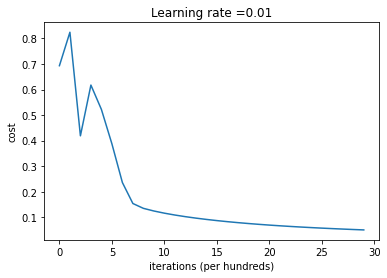

In [27]:
costs = np.squeeze(d['cost'])
pt.plot(costs)
pt.ylabel('cost')
pt.xlabel('iterations (per hundreds)')
pt.title("Learning rate =" + str(d["Learning_Rate"]))
pt.show()

## Importing Another image to test

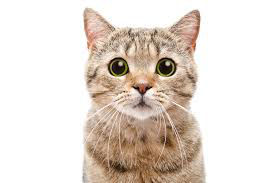

In [30]:
my_cat_img = Image.open('cat.jpeg')
my_cat_img

In [31]:
my_cat_img = my_cat_img.resize((64, 64))

In [33]:
my_cat_img = np.array(my_cat_img)
print('The shape of image is {}.'.format(my_cat_img.shape))

The shape of image is (64, 64, 3).


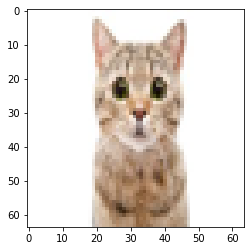

In [34]:
pt.imshow(my_cat_img)
pt.show()

In [35]:
my_cat_img = my_cat_img.reshape(1, my_cat_img.size).T

In [36]:
my_cat_img.shape

(12288, 1)

In [38]:
my_prediction = predict(d['W'],d['b'], my_cat_img)

In [39]:
print('Our prediction is {}; that is a cat.'.
      format(my_prediction[0][0]))

Our prediction is 1.0; that is a cat.


## Importing another image to test 

The shape of image is (64, 64, 3).


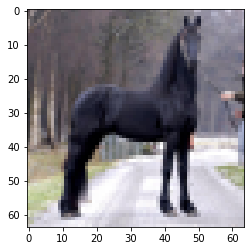

Our prediction is 1.0; that is a non-cat picture.


In [41]:
my_noncat_img = Image.open('horse.jpg')
my_noncat_img
my_noncat_img = my_noncat_img.resize((64, 64))
my_noncat_img = np.array(my_noncat_img)
print('The shape of image is {}.'.format(my_noncat_img.shape))
pt.imshow(my_noncat_img)
pt.show()
my_noncat_img = my_noncat_img.reshape(1, my_noncat_img.size).T
my_prediction = predict(d['W'],d['b'], my_noncat_img)
print('Our prediction is {}; that is a non-cat picture.'.
      format(my_prediction[0][0]))